<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# interactive data visualization

## 0. introduction

* interactive are the new big thing in visualization.
* interactivity involves things as: zoom, extra information on hoover, tooltips, easy download, etc.
* most libraries are built on top of [D3.js](https://d3js.org/), [paper](http://paperjs.org/), and other JavaScript libraries for visualization.
* nowadays there are several alternatives to use plotly:
    * pure plotly
    * plotly express
    * cufflinks

## 1. installing plotly and jupyter support

* for jupyter classic support, `ipywidgets` is needed.
* for jupyterlab support an extension is needed:
    * `conda activate jupyter_env`
    * `jupyter labextension install jupyterlab-plotly@1.5.0 --no-build` (need nodejs, can install doing `conda install nodejs`)
    * `jupyter lab build` (need nodejs, can install doing `conda install nodejs`)

## 2. data loading

In [1]:
import pandas as pd
churn = pd.read_csv('./data/churn.csv')

In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


## 1. interactive plots with plotly

In [5]:
import cufflinks as cf
import pandas as pd
import plotly.express as px

In [6]:
cf.go_offline()

In [7]:
?pd.DataFrame.iplot

Signature:
pd.DataFrame.iplot(
    self,
    kind='scatter',
    data=None,
    layout=None,
    filename='',
    sharing=None,
    title='',
    xTitle='',
    yTitle='',
    zTitle='',
    theme=None,
    colors=None,
    colorscale=None,
    fill=False,
    width=None,
    dash='solid',
    mode='',
    interpolation='linear',
    symbol='circle',
    size=12,
    barmode='',
    sortbars=False,
    bargap=None,
    bargroupgap=None,
    bins=None,
    histnorm='',
    histfunc='count',
    orientation='v',
    boxpoints=False,
    annotations=None,
    keys=False,
    bestfit=False,
    bestfit_colors=None,
    mean=False,
    mean_colors=None,
    categories='',
    x='',
    y='',
    z='',
    text='',
    gridcolor=None,
    zerolinecolor=None,
    margin=None,
    labels=None,
    values=None,
    secondary_y='',
    secondary_y_title='',
    subplots=False,
    shape=None,
    error_x=None,
    error_y=None,
    error_type='data',
    locations=None,
    lon=None,
    lat=Non

### 1.1 histograms

using cufflinks...

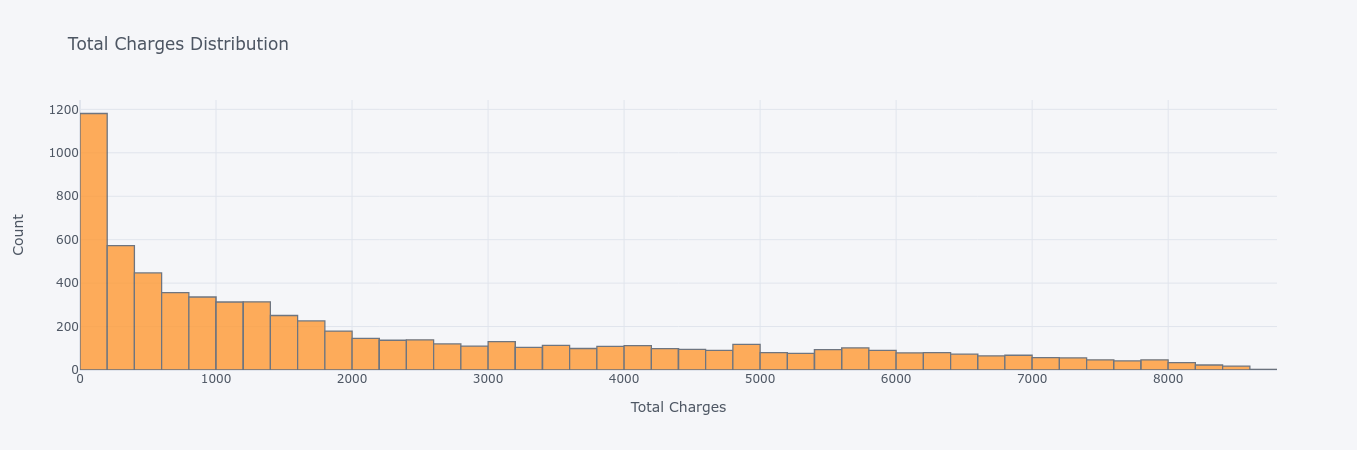

In [8]:
churn['TotalCharges'].iplot(kind='hist', title='Total Charges Distribution', yTitle='Count', xTitle='Total Charges')

using plotly express...

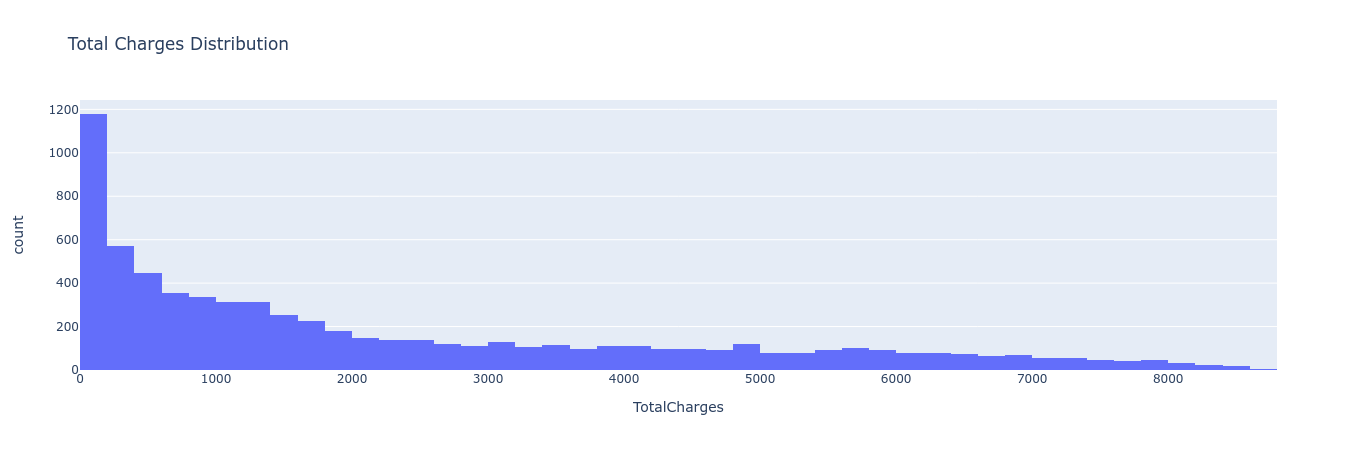

In [8]:
px.histogram(churn, x='TotalCharges', title='Total Charges Distribution')

In [9]:
hue_internet_type = churn.pivot_table(values='MonthlyCharges', 
                                      columns='InternetService', 
                                      aggfunc='sum', 
                                      index='customerID')

hue_internet_type

InternetService,DSL,Fiber optic,No
customerID,,,
0002-ORFBO,65.60,NaN,NaN
0003-MKNFE,59.90,NaN,NaN
0004-TLHLJ,NaN,73.9,NaN
0011-IGKFF,NaN,98.0,NaN
0013-EXCHZ,NaN,83.9,NaN
...,...,...,...
9987-LUTYD,55.15,NaN,NaN
9992-RRAMN,NaN,85.1,NaN
9992-UJOEL,50.30,NaN,NaN


using cufflinks...

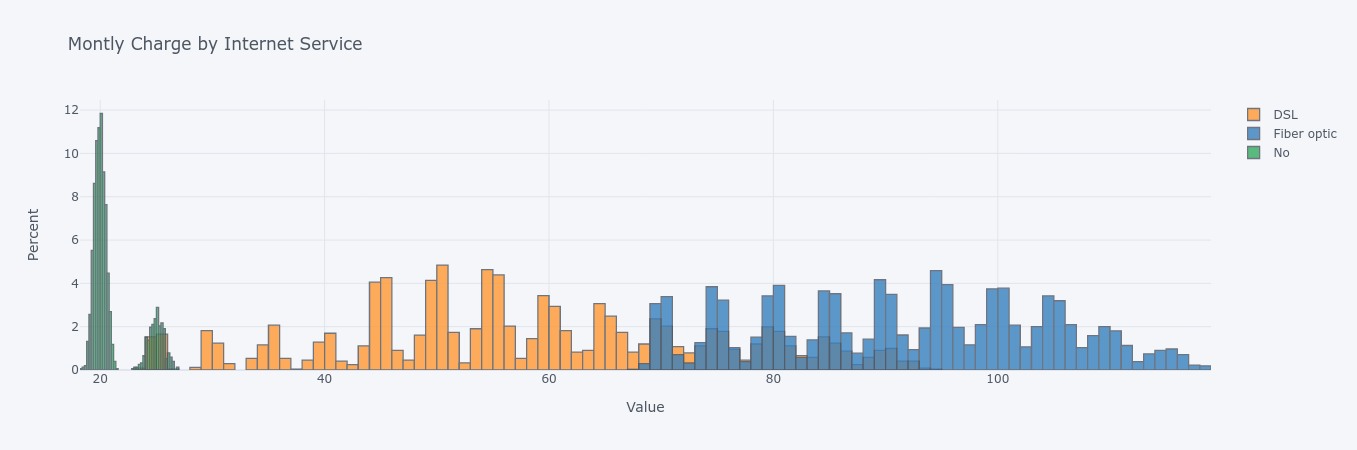

In [12]:
hue_internet_type.iplot(kind='hist', 
                       histnorm='percent', 
                       xTitle='Value', 
                       yTitle='Percent', 
                       title='Montly Charge by Internet Service')

plotly express...

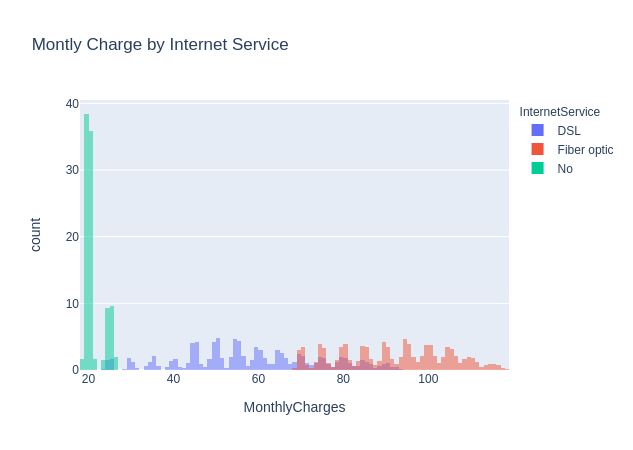

In [13]:
px.histogram(data_frame=churn, 
             x='MonthlyCharges', 
             color='InternetService', 
             histnorm='percent', 
             barmode='overlay',
             title='Montly Charge by Internet Service',
             nbins=150)

there is the possibility of removing a category with just a click... and save the plot...

generating a plot grid per category is also possible...

In [14]:
hue_payment_method = churn.pivot_table(values='MonthlyCharges', 
                                       columns='PaymentMethod', 
                                       index='customerID', 
                                       aggfunc='sum')

hue_payment_method

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
customerID,,,,
0002-ORFBO,NaN,NaN,NaN,65.60
0003-MKNFE,NaN,NaN,NaN,59.90
0004-TLHLJ,NaN,NaN,73.9,NaN
0011-IGKFF,NaN,NaN,98.0,NaN
0013-EXCHZ,NaN,NaN,NaN,83.90
...,...,...,...,...
9987-LUTYD,NaN,NaN,NaN,55.15
9992-RRAMN,NaN,NaN,85.1,NaN
9992-UJOEL,NaN,NaN,NaN,50.30


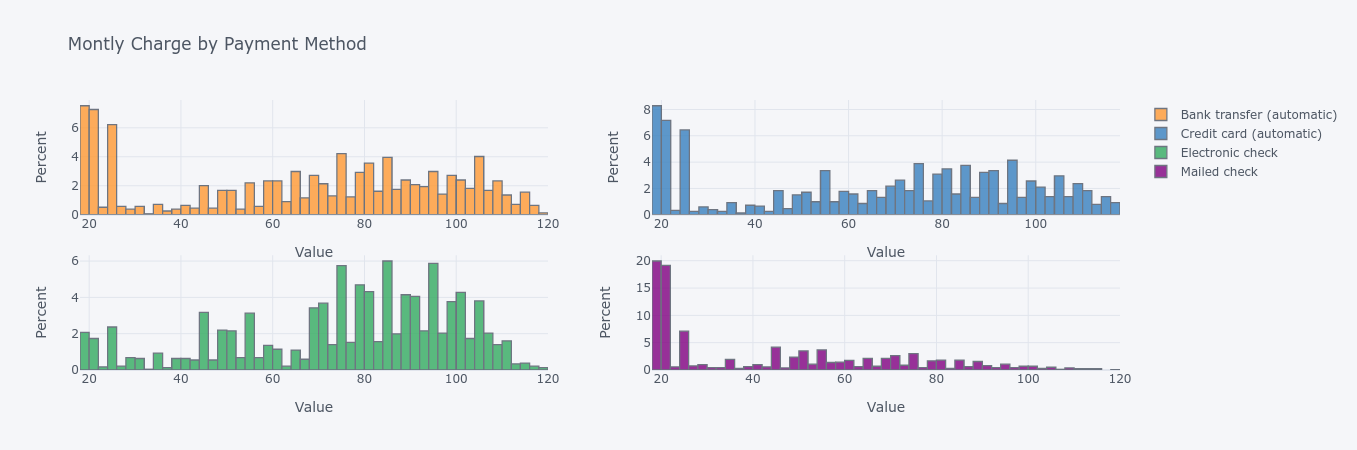

In [15]:
hue_payment_method.iplot(kind='hist', 
                       histnorm='percent', 
                       xTitle='Value', 
                       yTitle='Percent', 
                       title='Montly Charge by Payment Method',
                       subplots=True)

using plotly express...

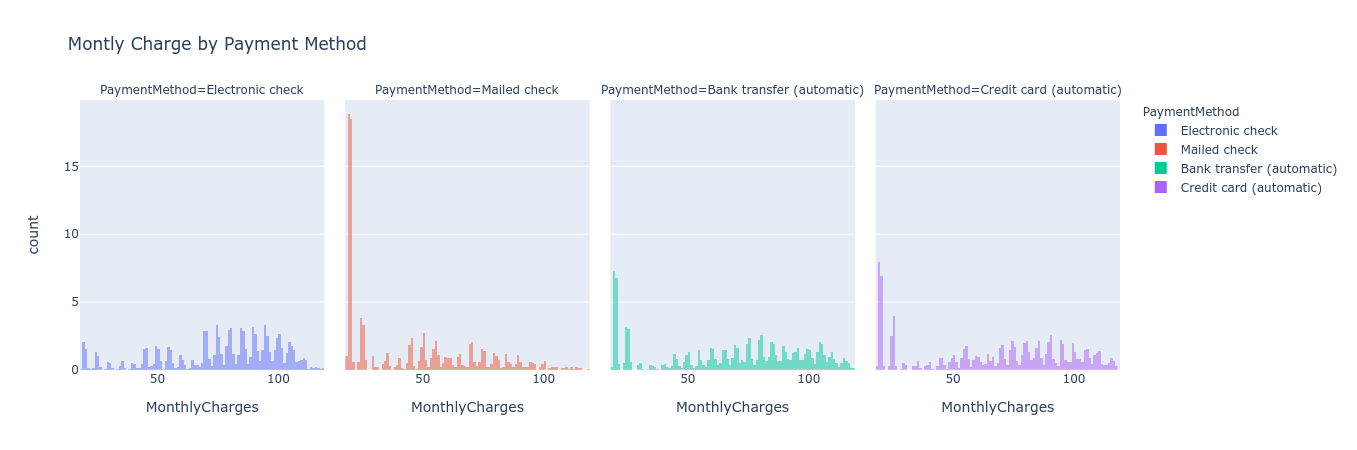

In [16]:
px.histogram(data_frame=churn, 
             x='MonthlyCharges',
             color='PaymentMethod', 
             histnorm='percent', 
             barmode='overlay',
             title='Montly Charge by Payment Method',
             nbins=150, 
             facet_col ='PaymentMethod')

### 1.2 bar charts

In [17]:
churn_by_payment = churn.groupby('PaymentMethod', as_index=False).agg({'ChurnBinary':'mean'})

In [18]:
churn_by_payment

,PaymentMethod,ChurnBinary
0,Bank transfer (automatic),0.167315
1,Credit card (automatic),0.152531
2,Electronic check,0.452854
3,Mailed check,0.192020


using cufflinks...

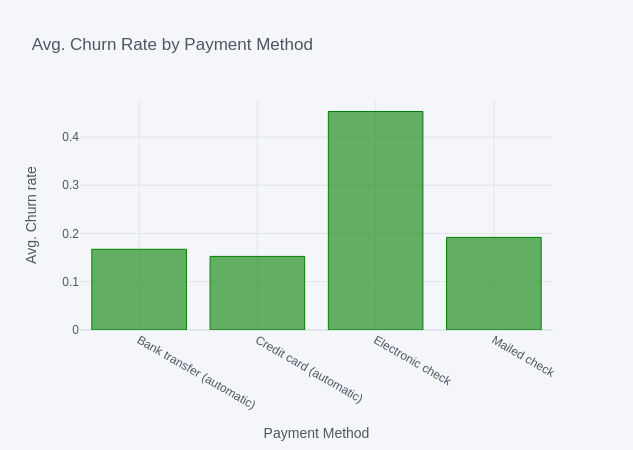

In [19]:
churn_by_payment.iplot(kind='bar', 
                       x='PaymentMethod', 
                       xTitle='Payment Method', 
                       yTitle='Avg. Churn rate', 
                       title='Avg. Churn Rate by Payment Method', 
                       color='green')

using plotly express:

In [20]:
churn_by_payment['ChurnBinary'].values

array([0.16731518, 0.15253123, 0.45285412, 0.19201995])

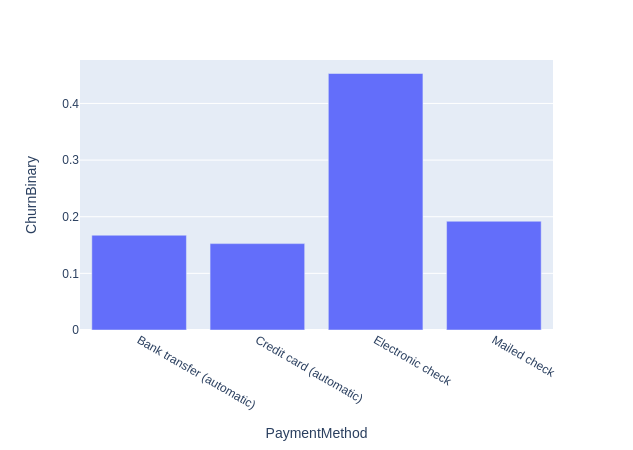

In [21]:
px.bar(data_frame=churn_by_payment, x='PaymentMethod', y='ChurnBinary')

to create a multiple bar plot for lots of categories...

In [22]:
gender = churn.pivot_table(values='MonthlyCharges', 
                           columns='gender',
                           index='TenureLevel', 
                           aggfunc='mean')

In [23]:
gender

gender,Female,Male
TenureLevel,,
Loyal,68.443267,69.268363
New,47.611534,45.411223
Regular,50.765968,49.762400
Very Loyal,93.963026,93.161889


In [24]:
senior = churn.pivot_table(values='MonthlyCharges', 
                           columns='SeniorCitizen',
                           index='TenureLevel', 
                           aggfunc='mean')

In [25]:
senior

SeniorCitizen,0,1
TenureLevel,,
Loyal,66.484124,79.376615
New,44.188586,62.971296
Regular,47.494365,69.347982
Very Loyal,92.892572,96.008069


In [26]:
partner = churn.pivot_table(values='MonthlyCharges', 
                         columns='Partner',
                         index='TenureLevel', 
                         aggfunc='mean')

In [27]:
partner

Partner,No,Yes
TenureLevel,,
Loyal,72.226413,65.971239
New,47.597119,43.189066
Regular,55.520779,43.508973
Very Loyal,94.732398,93.075060


In [28]:
concat_data = pd.concat([gender, senior, partner], axis=1)
concat_data.columns = ['Female', 'Male', 'NonSenior', 'Senior', 'Single', 'Partner']
concat_data.reset_index(inplace=True)
order_dict = {'New': 0, 'Regular': 1, 'Loyal': 2, 'Very Loyal': 3}
concat_data = concat_data.iloc[concat_data['TenureLevel'].map(order_dict).argsort()]

In [29]:
concat_data

,TenureLevel,Female,Male,NonSenior,Senior,Single,Partner
1,New,47.611534,45.411223,44.188586,62.971296,47.597119,43.189066
2,Regular,50.765968,49.762400,47.494365,69.347982,55.520779,43.508973
0,Loyal,68.443267,69.268363,66.484124,79.376615,72.226413,65.971239
3,Very Loyal,93.963026,93.161889,92.892572,96.008069,94.732398,93.075060


using cufflinks...

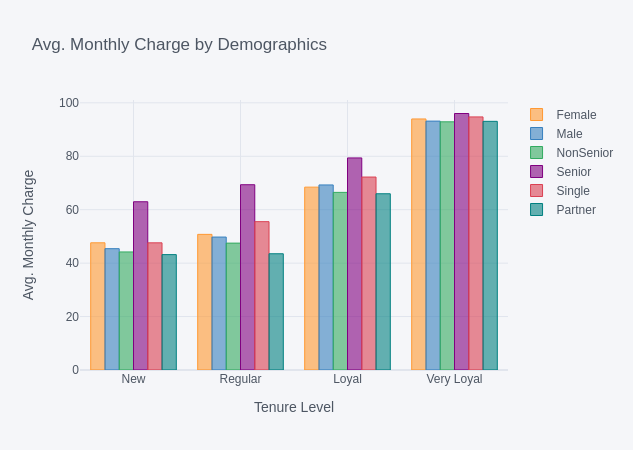

In [30]:
concat_data.iplot(kind='bar', 
                  x='TenureLevel', 
                  xTitle='Tenure Level',
                  yTitle='Avg. Monthly Charge', 
                  title='Avg. Monthly Charge by Demographics')

using plotly express... there is no way to get a plot without manipulating data, but close...

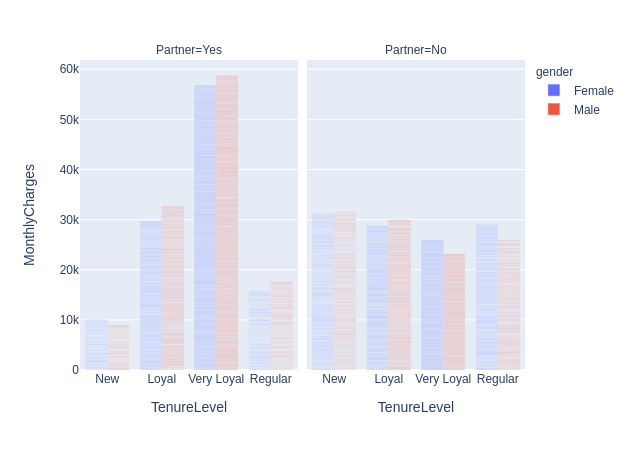

In [31]:
px.bar(data_frame=churn, color='gender', x='TenureLevel', barmode='group', y='MonthlyCharges', 
       facet_col='Partner')

### 1.3 line charts

using cufflinks...

In [32]:
churn_by_tenure = churn.groupby('tenure', as_index=False).agg({'ChurnBinary': 'mean'})

In [33]:
churn_by_tenure

,tenure,ChurnBinary
0,1,0.619902
1,2,0.516807
2,3,0.470000
3,4,0.471591
4,5,0.481203
...,...,...
67,68,0.090000
68,69,0.084211
69,70,0.092437
70,71,0.035294


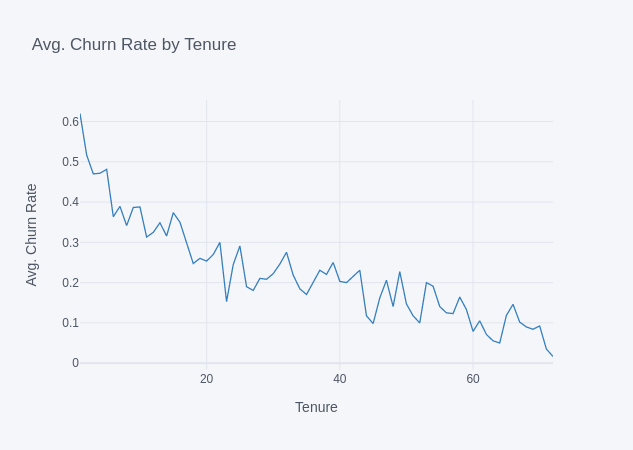

In [34]:
churn_by_tenure.iplot(kind='line', 
                      x='tenure', 
                      xTitle='Tenure', 
                      color='blue',
                      yTitle='Avg. Churn Rate', 
                      title='Avg. Churn Rate by Tenure')

using plotly express...

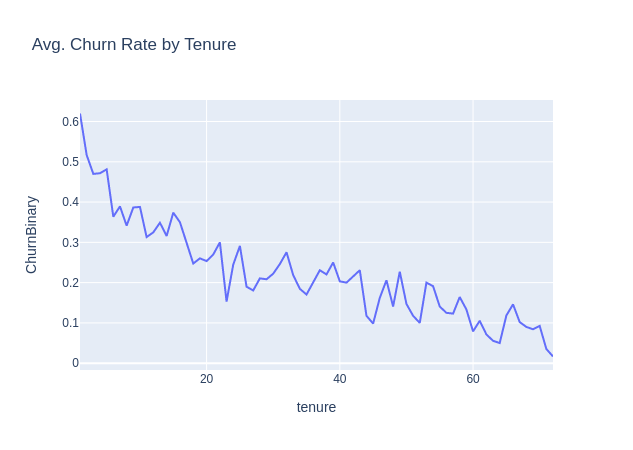

In [35]:
px.line(data_frame=churn_by_tenure, 
        x='tenure', 
        y='ChurnBinary', 
        title='Avg. Churn Rate by Tenure')

to plot multiple lines...

In [36]:
gender = churn.pivot_table(values='ChurnBinary', 
                           columns='gender',
                           index='tenure', 
                           aggfunc='mean')

senior = churn.pivot_table(values='ChurnBinary', 
                        columns='SeniorCitizen',
                        index='tenure', 
                        aggfunc='mean')

partner = churn.pivot_table(values='ChurnBinary', 
                         columns='Partner',
                         index='tenure', 
                         aggfunc='mean')

concat_data = pd.concat([gender, senior, partner], axis=1)
concat_data.columns = ['Female', 'Male', 'NonSenior', 'Senior', 'Single', 'Partner']
concat_data.reset_index(inplace=True)

In [37]:
concat_data

,tenure,Female,Male,NonSenior,Senior,Single,Partner
0,1,0.654930,0.589666,0.580645,0.860465,0.609709,0.673469
1,2,0.523077,0.509259,0.476923,0.697674,0.542105,0.416667
2,3,0.495050,0.444444,0.422857,0.800000,0.464052,0.489362
3,4,0.534091,0.409091,0.466667,0.500000,0.476562,0.458333
4,5,0.469697,0.492537,0.449541,0.625000,0.474227,0.500000
...,...,...,...,...,...,...,...
67,68,0.083333,0.096154,0.057471,0.307692,0.038462,0.108108
68,69,0.025000,0.127273,0.073171,0.153846,0.160000,0.057143
69,70,0.080645,0.105263,0.088235,0.117647,0.130435,0.083333
70,71,0.011905,0.058140,0.035971,0.032258,0.034483,0.035461


using cufflinks...

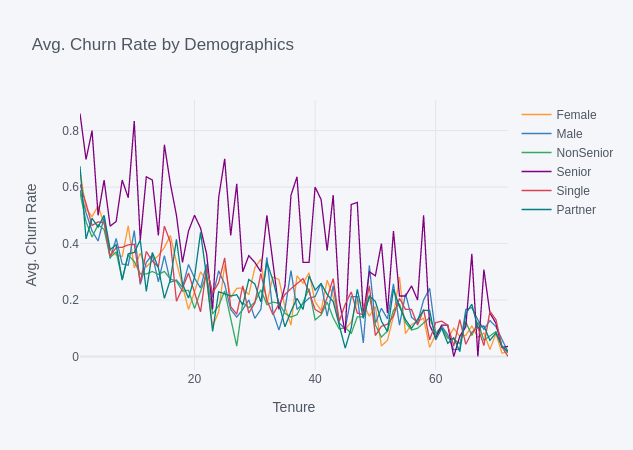

In [38]:
concat_data.iplot(kind='line', 
                  x='tenure', 
                  xTitle='Tenure',
                  yTitle='Avg. Churn Rate', 
                  title='Avg. Churn Rate by Demographics')

using plotly express...

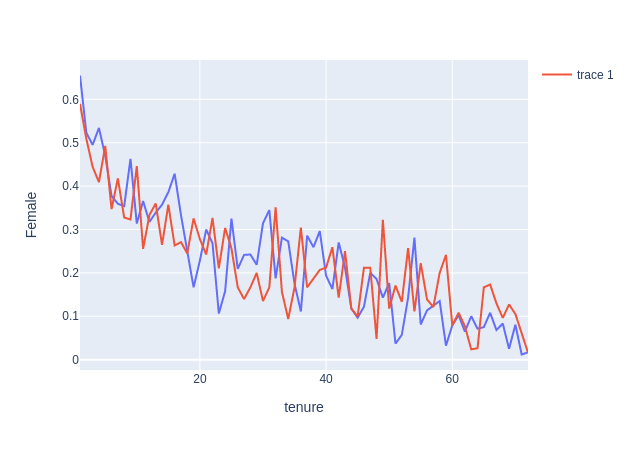

In [39]:
fig = px.line(data_frame=concat_data, x='tenure', y='Female')
fig.add_scatter(x=concat_data['tenure'], y=concat_data['Male'])
fig.show()

### 1.4 scatter plots

In [40]:
churn_filtered = churn[(churn['Contract']=='One year') & \
                       (churn['PaymentMethod']=='Credit card (automatic)')]

churn_filtered.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,One year,No,Credit card (automatic),100.35,5681.10,No,Very High,Very High,Very Loyal,0.0
54,4667-QONEA,Female,1,Yes,Yes,60,Yes,No,DSL,Yes,...,One year,Yes,Credit card (automatic),74.85,4456.35,No,Moderate,High,Very Loyal,0.0
56,8769-KKTPH,Female,0,Yes,Yes,63,Yes,Yes,Fiber optic,Yes,...,One year,Yes,Credit card (automatic),99.65,6311.20,No,Very High,Very High,Very Loyal,0.0
63,0557-ASKVU,Female,0,Yes,Yes,18,Yes,No,DSL,No,...,One year,Yes,Credit card (automatic),54.40,957.10,No,Low,Moderate,Regular,0.0
76,6416-JNVRK,Female,0,No,No,46,Yes,No,DSL,No,...,One year,No,Credit card (automatic),55.65,2688.85,No,Low,High,Loyal,0.0


using cufflinks...

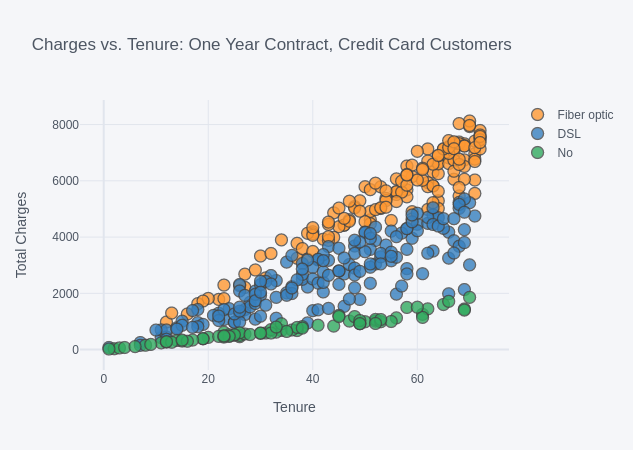

In [41]:
churn_filtered.iplot(x='tenure', 
                     y='TotalCharges', 
                     categories='InternetService',
                     xTitle='Tenure', 
                     yTitle='Total Charges',
                     title='Charges vs. Tenure: One Year Contract, Credit Card Customers')

using plotly express...

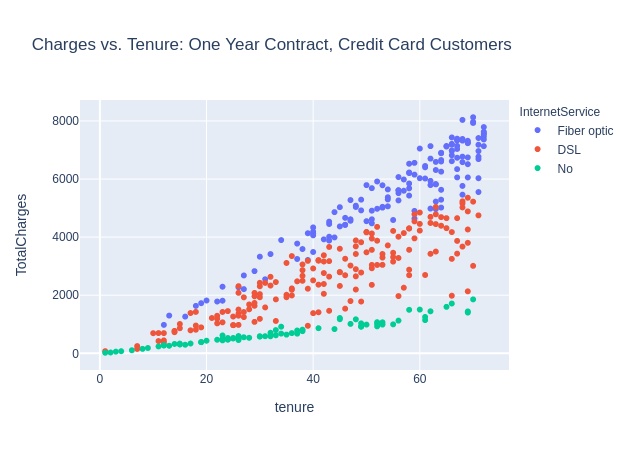

In [42]:
px.scatter(data_frame=churn_filtered, 
           x='tenure', 
           y='TotalCharges', 
           color='InternetService', 
           title='Charges vs. Tenure: One Year Contract, Credit Card Customers')

### 1.5 bubble charts (are also scatterplots, but representing a new variable using size of marker)

In [43]:
churn_filtered = churn_filtered[churn_filtered['PhoneService']=='No']

In [44]:
churn_filtered.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
568,0308-IVGOK,Female,0,No,No,11,No,No phone service,DSL,No,...,One year,Yes,Credit card (automatic),40.40,422.60,No,Low,Low,Regular,0.0
845,2316-ESMLS,Female,0,Yes,Yes,12,No,No phone service,DSL,Yes,...,One year,No,Credit card (automatic),33.15,444.75,No,Low,Low,Regular,0.0
882,5170-PTRKA,Female,0,Yes,Yes,49,No,No phone service,DSL,Yes,...,One year,Yes,Credit card (automatic),35.80,1782.00,No,Low,Moderate,Loyal,0.0
1118,4081-DYXAV,Female,0,No,No,19,No,No phone service,DSL,No,...,One year,Yes,Credit card (automatic),44.85,893.55,Yes,Low,Low,Regular,1.0
1165,1282-IHQAC,Male,1,No,No,70,No,No phone service,DSL,No,...,One year,Yes,Credit card (automatic),44.05,3011.65,No,Low,High,Loyal,0.0


using cufflinks...

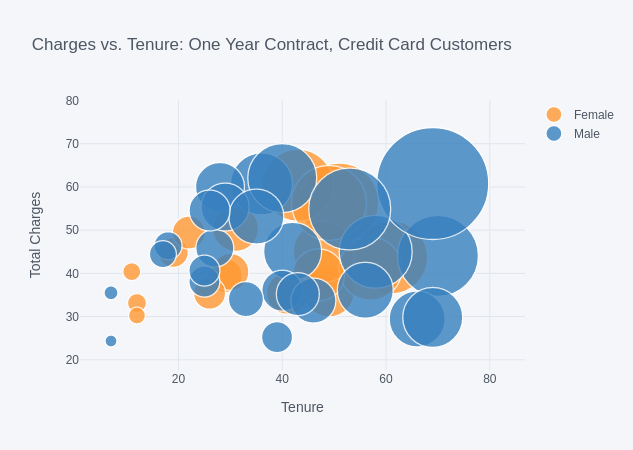

In [45]:
churn_filtered.iplot(kind='bubble', 
                     x='tenure', 
                     y='MonthlyCharges', 
                     size='TotalCharges',
                     categories='gender', 
                     xTitle='Tenure', 
                     yTitle='Total Charges',
                     title='Charges vs. Tenure: One Year Contract, Credit Card Customers')

using plotly express...

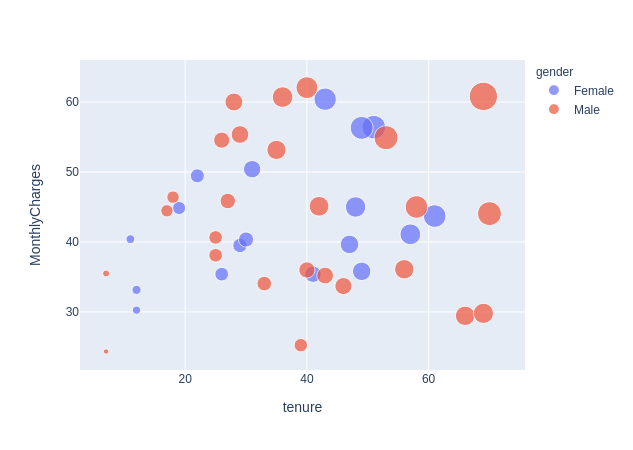

In [47]:
px.scatter(data_frame=churn_filtered, 
           x='tenure', 
           y='MonthlyCharges', 
           size='TotalCharges', 
           color='gender')

### 1.5 heatmaps

In [48]:
churn_by_tenure_monthlevel = churn.pivot_table(values='ChurnBinary', 
                             columns='MonthLevel',
                             index='tenure', 
                             aggfunc='mean')

using cufflinks...

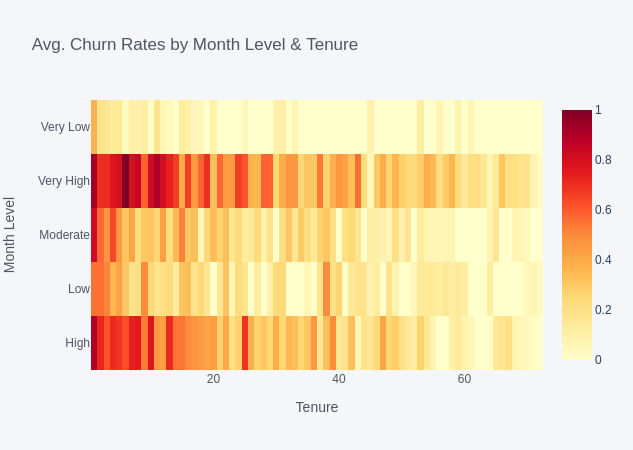

In [49]:
churn_by_tenure_monthlevel.iplot(kind='heatmap', 
                                 colorscale='YlOrRd', 
                                 xTitle='Tenure',
                                 yTitle='Month Level', 
                                 title='Avg. Churn Rates by Month Level & Tenure')

using plotly express...

In [50]:
churn_by_tenure_monthlevel

MonthLevel,High,Low,Moderate,Very High,Very Low
tenure,,,,,
1,0.890411,0.553763,0.819876,0.923077,0.377778
2,0.720000,0.557377,0.571429,0.700000,0.185185
3,0.617647,0.517857,0.471698,0.705882,0.175000
4,0.709677,0.358491,0.642857,0.769231,0.135135
5,0.685714,0.437500,0.466667,0.800000,0.153846
...,...,...,...,...,...
68,0.074074,0.000000,0.071429,0.214286,0.000000
69,0.055556,0.000000,0.076923,0.181818,0.000000
70,0.041667,0.058824,0.045455,0.190476,0.000000


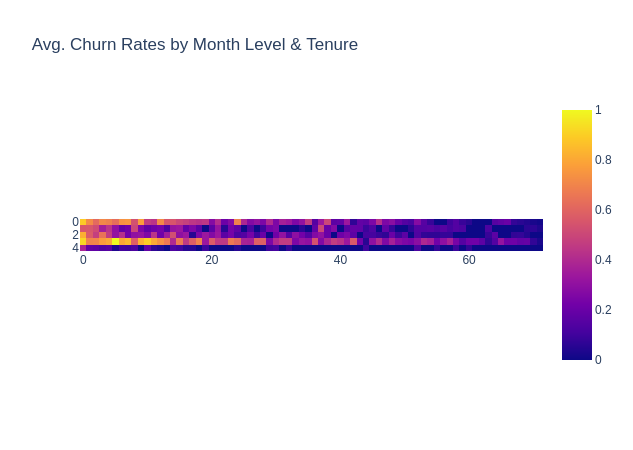

In [51]:
px.imshow(churn_by_tenure_monthlevel.T.values, title='Avg. Churn Rates by Month Level & Tenure')

using pure plotly...

In [52]:
import plotly.graph_objects as go

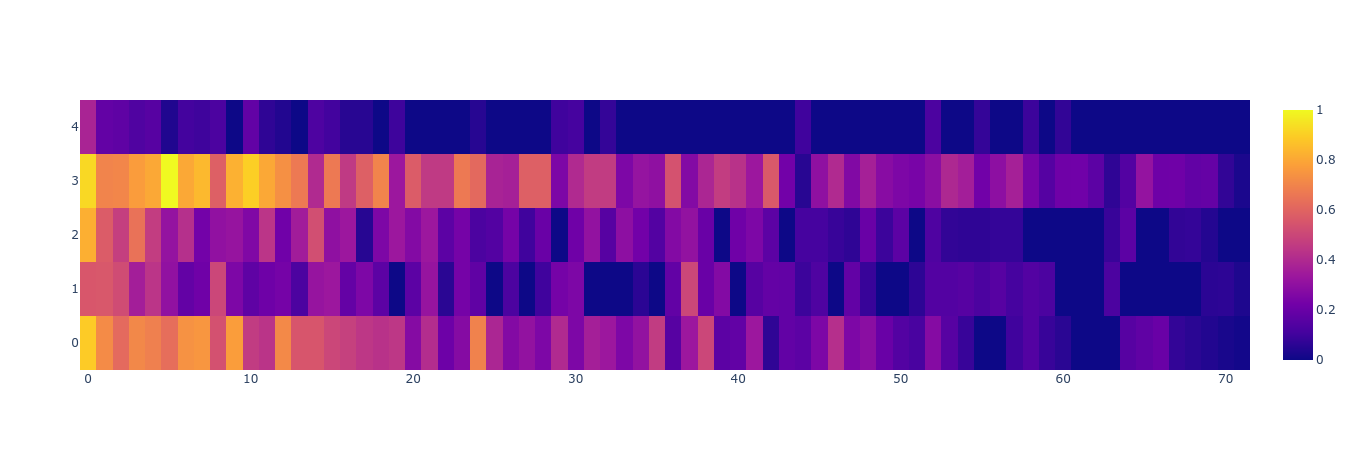

In [53]:
fig = go.Figure(data=go.Heatmap(
                    z=churn_by_tenure_monthlevel.T.values))
fig.show()

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>